In [2]:
# Standard Imports
import pandas as pd
import numpy as np
import os
from datetime import datetime

# Model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, fbeta_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Sampling for Imbalanced Data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation Tools
#import shap
#from lime.lime_tabular import LimeTabularExplainer

In [3]:
df = pd.read_csv("C:/Users/janec/Downloads/updated_dataset.csv")
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,VPN used,usual IP Address,known device,time to last transaction
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.454267
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.134098
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.136783
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.328188
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.309916
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.652585
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.849675
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.168035
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.880779


In [4]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,VPN used,usual IP Address,known device,time to last transaction
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403,0.35000,0.325165,0.325656,3.501953
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425,0.47697,0.468437,0.468620,2.020649
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000008
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.754444
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,3.501074
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000,1.000000,5.253067
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,6.999996


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
 8   VPN used                        1000000 non-null  float64
 9   usual IP Address                1000000 non-null  float64
 10  known device                    1000000 non-null  float64
 11  time to last transaction        1000000 non-null  float64
dtypes

In [6]:
df["fraud"].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [7]:
print(df.columns)

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud', 'VPN used',
       'usual IP Address', 'known device', 'time to last transaction'],
      dtype='object')


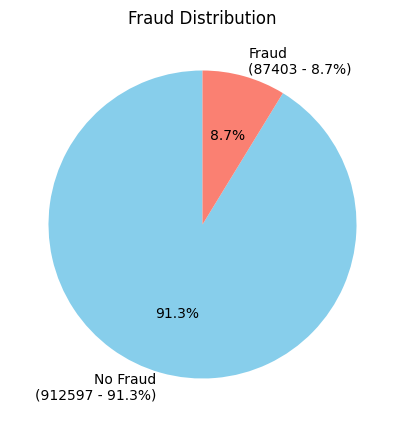

In [8]:
fraud_counts = df["fraud"].value_counts()
# Corrected calculation of total count
total_count = fraud_counts.sum()  # Sum of all occurrences

# Create the pie chart with corrected labels
plt.figure(figsize=(5, 5))
plt.pie(
    fraud_counts,
    labels=[
        f"No Fraud\n({fraud_counts[0]} - {fraud_counts[0] / total_count * 100:.1f}%)",
        f"Fraud\n({fraud_counts[1]} - {fraud_counts[1] / total_count * 100:.1f}%)"
    ],
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "salmon"]
)
plt.title("Fraud Distribution")
plt.show()

In [9]:
# Check for missing values again
missing_values = df.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print(f"Columns with missing data: {missing_columns}")
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows: {num_duplicates}")

Columns with missing data: Series([], dtype: int64)
Number of duplicate rows: 0


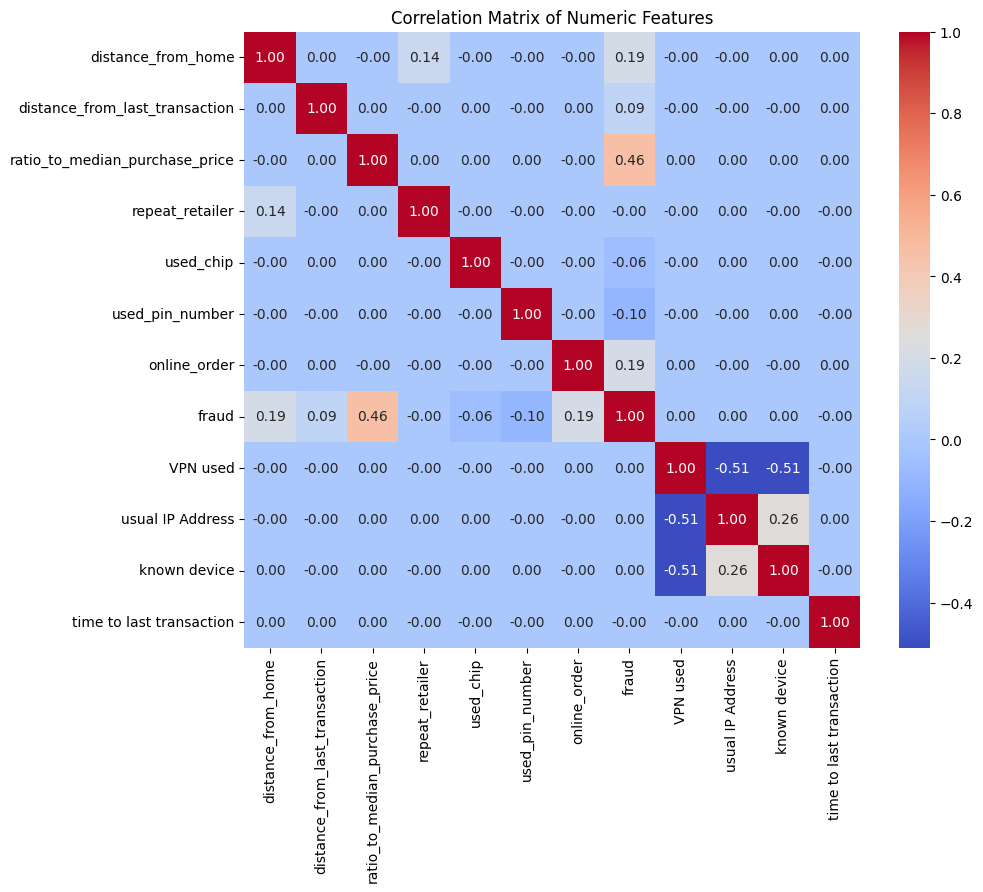

In [10]:
# Select only numeric features for the correlation matrix
numeric_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [11]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [12]:
# Train-test-Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

# Ensure y_train and y_test are integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

train_percentages = train_counts / len(y_train) * 100
test_percentages = test_counts / len(y_test) * 100

# Train set
print(f"Train Set:\n"
      f"Class 0: {train_counts[0]} samples ({train_percentages[0]:.2f}%)\n"
      f"Class 1: {train_counts[1]} samples ({train_percentages[1]:.2f}%)\n")

# Test set
print(f"Test Set:\n"
      f"Class 0: {test_counts[0]} samples ({test_percentages[0]:.2f}%)\n"
      f"Class 1: {test_counts[1]} samples ({test_percentages[1]:.2f}%)")

Train Set:
Class 0: 821337 samples (91.26%)
Class 1: 78663 samples (8.74%)

Test Set:
Class 0: 91260 samples (91.26%)
Class 1: 8740 samples (8.74%)


In [13]:
# Create a file to track experiments
file_name = "../experiment_results.csv"

# Define the columns for the CSV
columns = ["timestamp", "model", "params", "precision", "recall", "f2", "tn", "fp", "fn", "tp"]

# Check if the file already exists
if not os.path.exists(file_name):
    # Create a new DataFrame with the defined columns
    df = pd.DataFrame(columns=columns)
    # Save the DataFrame to a CSV file
    df.to_csv(file_name, index=False)
    print(f"{file_name} created with columns: {columns}")
else:
    print(f"{file_name} already exists and will not be overwritten.")

experiment_results.csv created with columns: ['timestamp', 'model', 'params', 'precision', 'recall', 'f2', 'tn', 'fp', 'fn', 'tp']


In [14]:
# File to store the results
RESULTS_FILE = "../experiment_results.csv"

In [15]:
def plot_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray, model_name: str):
    """
    Plot a confusion matrix for the model with class names (0: Retained, 1: Churn).
    """
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=["Retained (0)", "Churn (1)"],
        yticklabels=["Retained (0)", "Churn (1)"]
    )
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


def plot_roc_curve(y_true: np.ndarray, y_prob: np.ndarray, model_name: str):
    """
    Plot the ROC curve for the model.
    """
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()


def save_results(model_name: str, params: str, precision: float, recall: float, f2: float, tn: int, fp: int, fn: int, tp: int):
    """
    Save the evaluation results to the CSV file. If the same model and parameters exist, overwrite the row.
    """
    # Prepare the new row data
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    new_row = {
        "timestamp": timestamp,
        "model": model_name,
        "params": params,
        "precision": precision,
        "recall": recall,
        "f2": f2,
        "tn": tn,
        "fp": fp,
        "fn": fn,
        "tp": tp
    }

    # Check if the file exists
    if not os.path.exists(RESULTS_FILE):
        # If not, create a new DataFrame and save it
        pd.DataFrame([new_row]).to_csv(RESULTS_FILE, index=False)
        print(f"Results saved to {RESULTS_FILE}.")
    else:
        # Load existing results
        df = pd.read_csv(RESULTS_FILE)

        # Check if the same model and params exist
        exists = ((df["model"] == model_name) & (df["params"] == params)).any()

        if exists:
             # Overwrite the existing row
             for col, value in new_row.items():
                df.loc[(df["model"] == model_name) & (df["params"] == params), col] = value
        else:
            # Append the new row
            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

        # Save back to the CSV
        df.to_csv(RESULTS_FILE, index=False)
        print(f"Results updated in {RESULTS_FILE}.")


def evaluate_model(model, X_test: np.ndarray, y_test: np.ndarray, params: str, threshold: float = 0.5, model_name: str = "Model"):
    """
    Main evaluation function to calculate metrics, generate predictions,
    and call plotting functions for model evaluation.
    """
    # Get probabilities and raw predictions
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate precision and recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Calculate F2 score
    beta = 2
    f2 = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) if (precision + recall) > 0 else 0

    # Print evaluation metrics
    print(f"Evaluation of {model_name}")
    print("-----")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"F2 Score: {f2:.2f}")

    # Save the results
    save_results(model_name, params, precision, recall, f2, tn, fp, fn, tp)

    # Call individual plotting functions
    plot_confusion_matrix(y_test, y_pred, model_name)
    plot_roc_curve(y_test, y_prob, model_name)


In [16]:
# Create a simple decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)

Evaluation of DecisionTreeClassifier
-----
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91260
           1       0.87      0.91      0.89      8740

    accuracy                           0.98    100000
   macro avg       0.93      0.95      0.94    100000
weighted avg       0.98      0.98      0.98    100000

F2 Score: 0.90
Results updated in experiment_results.csv.


C:\Users\janec\AppData\Local\Temp\ipykernel_19676\1753926867.py:72: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


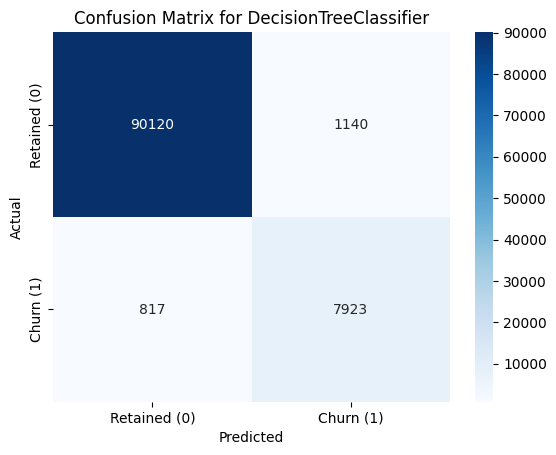

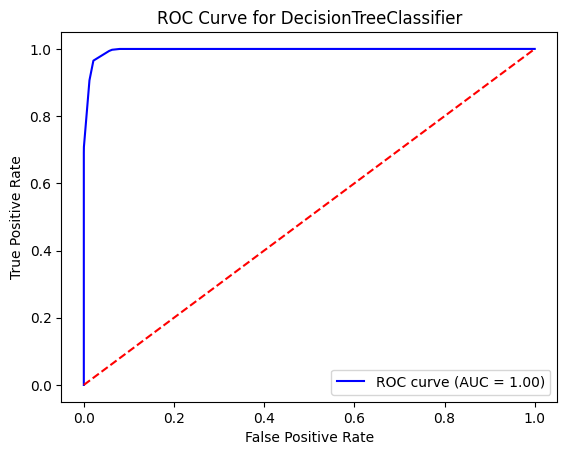

In [17]:
# Fit the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Define the model parameters as a string
params = "{'max_depth': 3}"

# Evaluate the model
evaluate_model(clf, X_test, y_test, params=params, model_name="DecisionTreeClassifier")

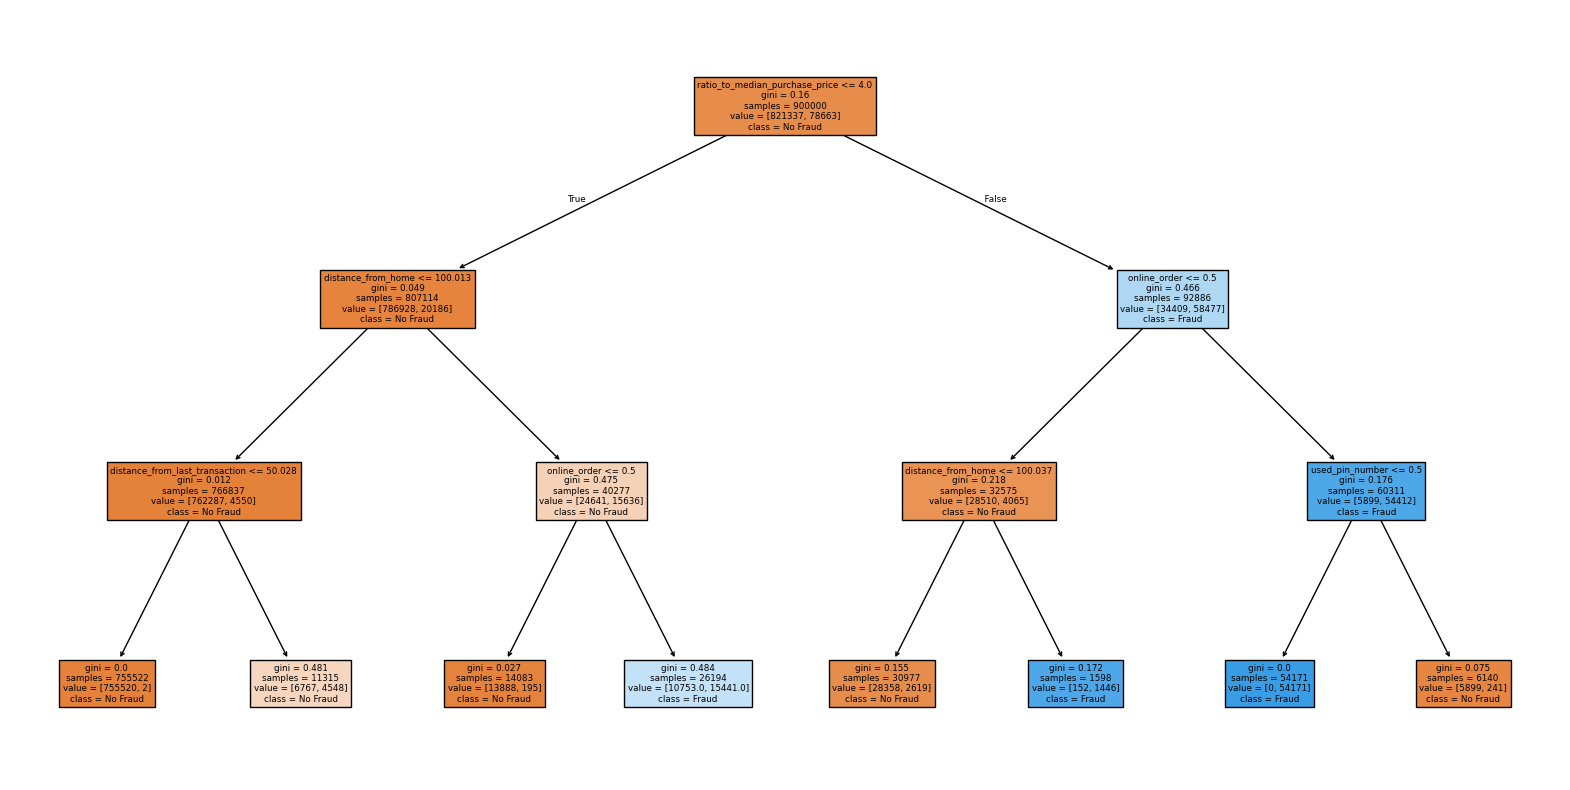

In [18]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the decision tree
plot_tree(clf, feature_names=X.columns, class_names=['No Fraud', 'Fraud'], filled=True, ax=ax)
# plt.savefig("imgs/default_decisiontreeclassifier")
plt.show()